<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_algebra/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое занятие 8
# Компьютерный практикум по алгебре на Python
## Численное решение систем линейных алгебраических уравнений (СЛАУ) с numpy.

https://numpy.org/doc/stable/reference/routines.linalg.html

In [1]:
import numpy as np
from numpy import linalg
from google.colab import files
import pandas as pd

### Задание 1.
Решить СЛАУ с помощью linalg.solve() и выполнить проверку подстановкой.
$$
\left\{
\begin{matrix}
-x+4y+3z=18\\
5x-y+4z=81\\
-3x+5y+5z=21
\end{matrix}
\right.
$$

In [6]:
A = np.array([[-1, 4, 3],
              [5, -1, 4],
              [-3, 5, 5]])
b = np.array([18, 81, 21])

X = np.linalg.solve(A, b)
print(f"solution:\n{X}")

assert np.allclose(np.dot(A, X), b)

solution:
[ 8. -1. 10.]


### Задание 2.
Определить с помощью Теоремы Кронекера-Капелли и linalg.matrix_rank, совместны ли СЛАУ
$$
a)\ \left\{
\begin{matrix}
-x + 4y + 3z = 18\\
5x - y + 4z = 81\\
8x - 13y - 5z = 2
\end{matrix}
\right.
b)\ \left\{
\begin{matrix}
-x + 4y + 3z = 18\\
5x - y + 4z = 81\\
8x - 13y - 5z = 27
\end{matrix}
\right.
c)\ \left\{
\begin{matrix}
-x + 4y + 3z = 18\\
5x - y + 4z = 81\\
8x - 13y - z = 27
\end{matrix}
\right.
$$

Сделать вывод о числе решений каждой СЛАУ (текстом)

In [8]:
def print_sol_num(A, Ab):
  print(f"Матрица\n{Ab}")
  if np.linalg.matrix_rank(A) != np.linalg.matrix_rank(Ab):
    print("- Нет решений")
    return

  if np.linalg.matrix_rank(Ab) < Ab.shape[0]:
    print("- Бесконечное число решений")
    return

  print("- Одно решение")


# a
A = np.array([[-1, 4, 3], [5, -1, 4], [8, -13, -5]])
Ab = np.array([[-1, 4, 3, 18], [5, -1, 4, 81], [8, -13, -5, 2]])
print_sol_num(A, Ab)

# a
A = np.array([[-1, 4, 3], [5, -1, 4], [8, -13, -5]])
Ab = np.array([[-1, 4, 3, 18], [5, -1, 4, 81], [8, -13, -5, 27]])
print_sol_num(A, Ab)

# c
A = np.array([[-1, 4, 3], [5, -1, 4], [8, -13, -1]])
Ab = np.array([[-1, 4, 3, 18], [5, -1, 4, 81], [8, -13, -1, 27]])
print_sol_num(A, Ab)



Матрица
[[ -1   4   3  18]
 [  5  -1   4  81]
 [  8 -13  -5   2]]
- Нет решений
Матрица
[[ -1   4   3  18]
 [  5  -1   4  81]
 [  8 -13  -5  27]]
- Бесконечное число решений
Матрица
[[ -1   4   3  18]
 [  5  -1   4  81]
 [  8 -13  -1  27]]
- Одно решение


### Задание 3
Описать функцию print_info с обязательным аргументом **$Ab$** - расширенной матрицей СЛАУ и необязательным аргументом  **end** (по умолчанию "\n", его нужно передавать функции print как ее  необязательный аргумент end), выводящую на экран

1) матрицу левой части СЛАУ

2) столбец правой части СЛАУ

3) транспонированную матрицу, полученную в 1)

4) расширенную матрицу, полученную из матрицы 3) и столбца 2)

5) созданную на основе списочного выражения np.array $3\times 4$ из расположенных в шахматном порядке чисел $a$ и $-a$, где $a$ - правый нижний элемент матрицы 3).

Применить полученную функцию к расширенным матрицам СЛАУ из Задания 2 со значением **end="\\n\\n"**, а затем  **end** по умолчанию.

In [12]:
def print_info(Ab, end="\n"):
  A = Ab[ : , :-1]
  print(f"1:\n{A}", end=end)

  b = Ab[ : , -1]
  print(f"2:\n{b}", end=end)

  AT = Ab[ : , :-1].T
  print(f"3:\n{AT}", end=end)

  ATb = np.column_stack((AT, b))
  print(f"4:\n{ATb}", end=end)

  a = AT[-1, -1]
  X = np.array([[((i + j) % 2 * 2 - 1) * a for j in range(4)] for i in range(3)])
  print(f"5:\n{X}", end=end)

Ab = np.array([[-1, 4, 3, 18], [5, -1, 4, 81], [8, -13, -5, 2]])
print_info(Ab, end="\n\n")
print_info(Ab)

1:
[[ -1   4   3]
 [  5  -1   4]
 [  8 -13  -5]]

2:
[18 81  2]

3:
[[ -1   5   8]
 [  4  -1 -13]
 [  3   4  -5]]

4:
[[ -1   5   8  18]
 [  4  -1 -13  81]
 [  3   4  -5   2]]

5:
[[ 5 -5  5 -5]
 [-5  5 -5  5]
 [ 5 -5  5 -5]]

1:
[[ -1   4   3]
 [  5  -1   4]
 [  8 -13  -5]]
2:
[18 81  2]
3:
[[ -1   5   8]
 [  4  -1 -13]
 [  3   4  -5]]
4:
[[ -1   5   8  18]
 [  4  -1 -13  81]
 [  3   4  -5   2]]
5:
[[ 5 -5  5 -5]
 [-5  5 -5  5]
 [ 5 -5  5 -5]]


### Задание 4.
Исследовать на совместность СЛАУ с параметром $a$ при значениях параметра $a=-1$, $a=0$ и $a=1$ и найти решение, если оно единственно и провести проверку подстановкой.
$$
\left\{
\begin{matrix}
-x+5y-3z=8a\\
4x-ay+5z=-a\\
3x+4y+2z=5a
\end{matrix}
\right.
$$
**Указание** - описать функцию check_SLAE от аргументов $A$ и $b$ (матрица левой части и столбец правой части), которая возвращает 0 для несовместной СЛАУ, 1 для совместной СЛАУ с единственным решением и 2 в остальных случаях.

Затем в цикле по значениям параметра $a$ проверять с помощью check_SLAE совместность и единственность решения СЛАУ и выводить на экран значение параметра и решение СЛАУ, если оно существует и единственно или "решений нет" или "решение не единственно".

In [17]:
def check_SLAE(A, b):
    Ab = np.column_stack((A, b))

    if np.linalg.matrix_rank(A) != np.linalg.matrix_rank(Ab):
        return 0

    if np.linalg.matrix_rank(A) == np.linalg.matrix_rank(Ab) == A.shape[1]:
        return 1

    return 2

for a in [-1, 0, 1]:
    A = np.array([[-1, 5, -3], [4, -a, 5], [3, 4, 2]])
    b = np.array([-8 * a, -a, 5 * a])

    res = check_SLAE(A, b)
    if res == 0:
      print(f"a = {a}: Нет решений")
      continue

    if res == 1:
      X = np.linalg.solve(A, b)
      print(f"a = {a}: Одно решение:\n{X}")
      continue

    print(f"a = {a}: Бесконечное число решений")

a = -1: Одно решение:
[-21.85714286   7.          16.28571429]
a = 0: Одно решение:
[ 0.  0. -0.]
a = 1: Нет решений


### Задание 5.
Считать из файла 'SLAE_5.xlsx' матрицу левой части и столбец правой части с листов 'A5' и 'b5' и вывести их на экран.

Решить СЛАУ $AX=b$ и вывести полученное решение на экран.

Записать полученное решение в файл  'SLAE_5.xlsx' на лист 'X5'.

Скачать полученный файл.

In [20]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving SLAE_5.xlsx to SLAE_5.xlsx


In [27]:
A = pd.read_excel("SLAE_5.xlsx", sheet_name='A5', header=None).to_numpy()
b = pd.read_excel("SLAE_5.xlsx", sheet_name='b5', header=None).to_numpy()

print(f"A:\n{A}")
print(f"B:\n{b}")

X = np.linalg.solve(A, b)
print(f"X:\n{X}")

df = pd.DataFrame(X, columns=['Solution'])
with pd.ExcelWriter("SLAE_5.xlsx", mode='a') as writer:
    df.to_excel(writer, sheet_name='X5', header=False, index=False)

A:
[[ -1   6   9  -1  -3  -8   9   9   1   6  -3   1   6  -3  -2   6   6  -7]
 [  3   5   0   8   3  -1 -10   9 -10   3  -9  -1   5   9   8  -9  -7   5]
 [  4   2  -3  -4  -9   3   9   5  -4   8  -4   1 -10   9  -3  -6  -5  -4]
 [ -7  -9  -5   4   3  -6  -6   7 -10   0   3  -7  -4  -7 -10   8   9   0]
 [  9  -1   7   9  -8  -2   6   0   3   3  -3  -3  -8  -6  -6  -7   2   0]
 [ -3   0   3   1  -6 -10  -8  -9  -7   7   6   6   1 -10   6  -7   6   1]
 [ -1  -6   8  -1   1  -7 -10   7 -10   3   2   6   2   0  -1 -10   6   3]
 [ -6  -5  -6   5   5  -7   0  -8   3  -2  -7  -2   0   1  -5  -4  -9  -9]
 [ -8   2  -8   9  -3   5  -5  -6   1   7   8  -3   1   6  -5   6   9  -2]
 [ -7   7   2  -9   4  -4  -8  -7   4   1  -9   9  -5   5  -6   4   2   0]
 [ -2  -2   7 -10  -3  -5 -10   8  -6   2  -9   1  -2   2  -3  -6  -5  -4]
 [  8  -2  -5 -10  -1  -2   8  -5  -1   7  -5   1   1 -10  -4   2   0  -5]
 [  1   4  -8 -10  -1   2   1   0   3   2   0   1   9  -8  -2  -5   5  -8]
 [ -3  -2   9   0  -7 

In [33]:
files.download("SLAE_5.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Индивидуальное задание.
Исследовать на совместность СЛАУ с параметром $a$ при заданных значениях параметра $a$ и найти решение, если оно единственно и провести проверку подстановкой.

На листы 'A1', 'A2' и т.п. файла 'Name_Ind_8_SLAE.xlsx' записать матрицы при заданных значениях параметра $a$, на листы 'b1', 'b2' и т.п. столбцы правой части СЛАУ, на листы 'X1', 'X2' и т.п. решения СЛАУ (если оно существует!).
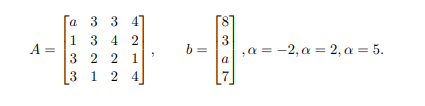


In [32]:
def check_SLAE(A, b):
    Ab = np.column_stack((A, b))

    if np.linalg.matrix_rank(A) != np.linalg.matrix_rank(Ab):
        return 0

    if np.linalg.matrix_rank(A) == np.linalg.matrix_rank(Ab) == A.shape[1]:
        return 1

    return 2

with pd.ExcelWriter("Name_Ind_8_SLAE.xlsx") as writer:
    for i, a in enumerate([-2, 2, 5], start=1):
        A = np.array([
            [a, 1, 3, 4],
            [3, 2, a, 1],
            [3, a, 2, 4],
            [1, 3, 2, 1]
        ])

        b = np.array([8, 3, a, 7]).reshape(-1, 1)

        pd.DataFrame(A).to_excel(writer, sheet_name=f'A{i}', index=False, header=False)
        pd.DataFrame(b).to_excel(writer, sheet_name=f'b{i}', index=False, header=False)

        res = check_SLAE(A, b)
        if res == 1:
            X = np.linalg.solve(A, b)
            df = pd.DataFrame(X)
            df.to_excel(writer, sheet_name=f'X{i}', index=False, header=False)

In [34]:
files.download("Name_Ind_8_SLAE.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>